 REDES NEURONALES

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import set_random_seed

In [2]:
# Ruta al directorio que contiene sus datos de imagen
data_dir = "../data/raw"

# Obtener una lista de todos los nombres de archivos de imágenes de perros
dog_subfolder = os.path.join(data_dir, "dog")

# Obtener una lista de todos los nombres de archivos de imágenes de perros
dog_image_files = os.listdir(dog_subfolder)

dog_images = []

for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path, target_size=(200, 200)) 
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalizar la imagen
    dog_images.append(img_array)

dog_images = np.array(dog_images)

dog_image_files = os.listdir(dog_subfolder)
print("Archivos en la subcarpeta 'dog':")
for file in dog_image_files:
            print(file)


Archivos en la subcarpeta 'dog':
dog.155.jpg
dog.11.jpg
dog.247.jpg
dog.171.jpg
dog.195.jpg
dog.216.jpg
dog.35.jpg
dog.114.jpg
dog.44.jpg
dog.227.jpg
dog.93.jpg
dog.16.jpg
dog.67.jpg
dog.188.jpg
dog.125.jpg
dog.78.jpg
dog.166.jpg
dog.160.jpg
dog.80.jpg
dog.140.jpg
dog.98.jpg
dog.138.jpg
dog.168.jpg
dog.19.jpg
dog.201.jpg
dog.133.jpg
dog.75.jpg
dog.32.jpg
dog.176.jpg
dog.57.jpg
dog.24.jpg
dog.248.jpg
dog.212.jpg
dog.101.jpg
dog.148.jpg
dog.100.jpg
dog.165.jpg
dog.38.jpg
dog.9.jpg
dog.244.jpg
dog.230.jpg
dog.200.jpg
dog.121.jpg
dog.45.jpg
dog.139.jpg
dog.92.jpg
dog.135.jpg
dog.73.jpg
dog.85.jpg
dog.64.jpg
dog.14.jpg
dog.25.jpg
dog.144.jpg
dog.226.jpg
dog.156.jpg
dog.164.jpg
dog.190.jpg
dog.193.jpg
dog.222.jpg
dog.181.jpg
dog.108.jpg
dog.130.jpg
dog.109.jpg
dog.241.jpg
dog.116.jpg
dog.221.jpg
dog.146.jpg
dog.169.jpg
dog.161.jpg
dog.102.jpg
dog.234.jpg
dog.96.jpg
dog.124.jpg
dog.22.jpg
dog.208.jpg
dog.203.jpg
dog.199.jpg
dog.213.jpg
dog.48.jpg
dog.27.jpg
dog.3.jpg
dog.105.jpg
dog.189.jpg
d

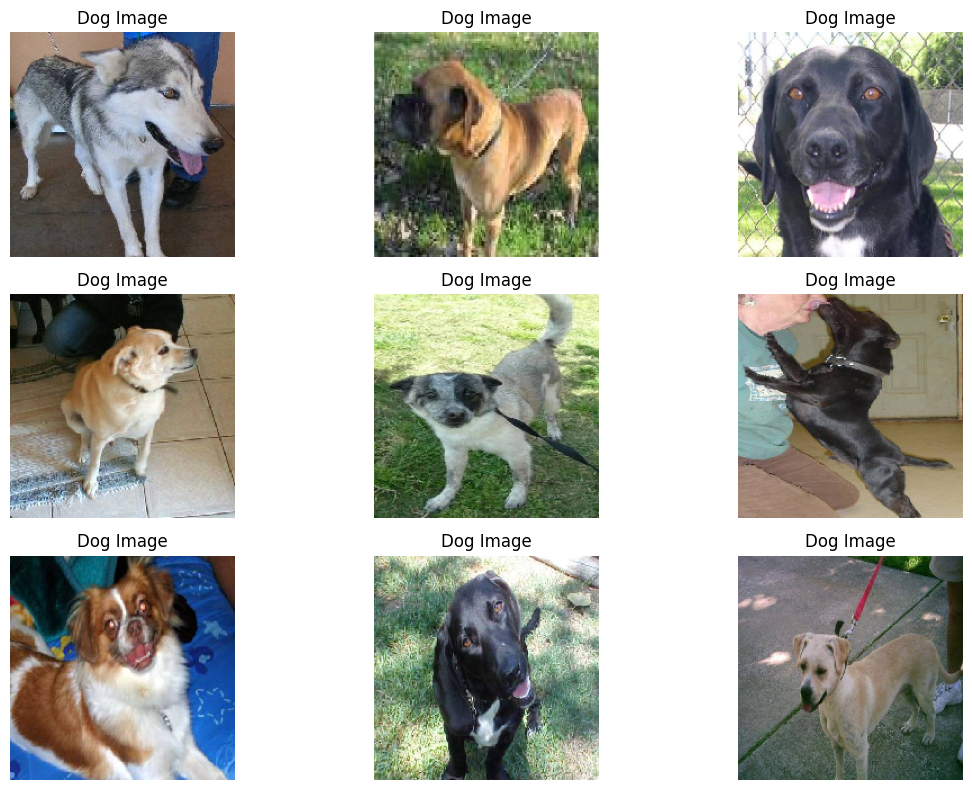

In [3]:

plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Ajustar el diseño
plt.tight_layout()

# Mostrar las imágenes
plt.show()

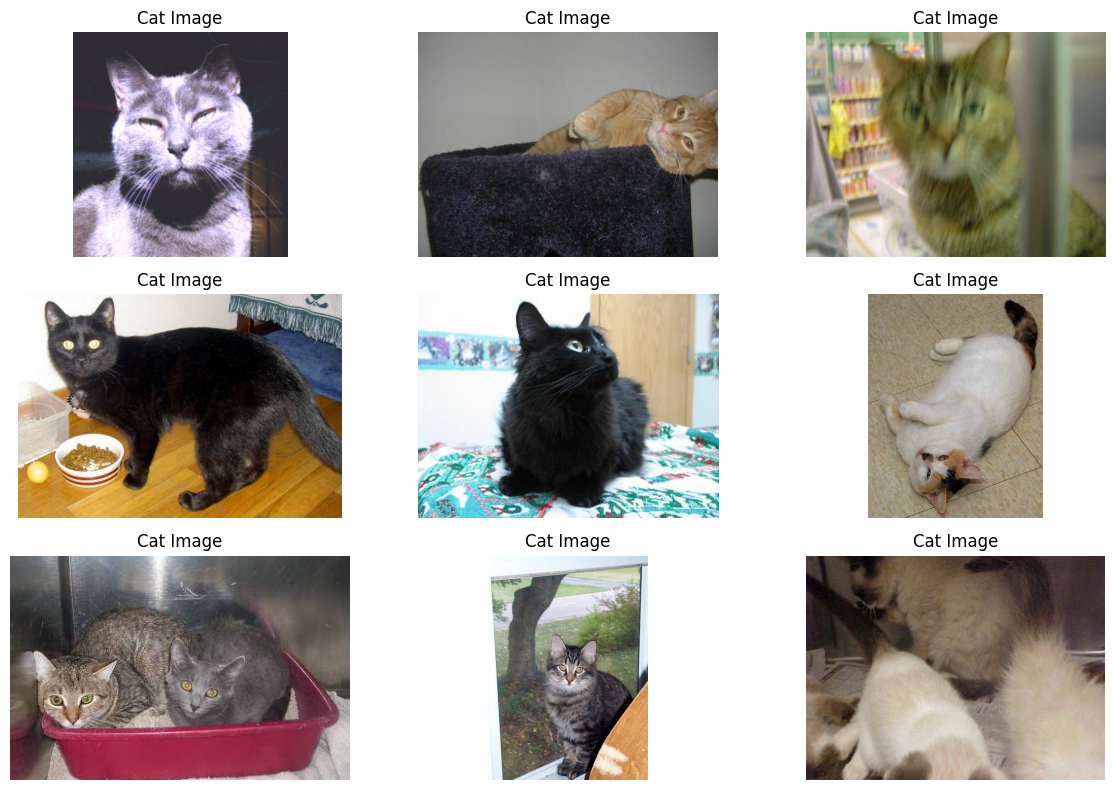

In [4]:

data_dir = "../data/raw"

# Obtener una lista de todos los nombres de archivos de imagen Cat
cats_subfolder = os.path.join(data_dir, "cat")

# Obtener una lista de todos los nombres de archivos de imagen Cat
cats_image_files = os.listdir(cats_subfolder)

# Cargar las nueve primeras imágenes de gato
cats_images = []
for i in range(min(9, len(cats_image_files))):  # Limitar a las imágenes de gato disponibles
    img_path = os.path.join(cats_subfolder, cats_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cats_images.append(img_array)

# Crear una única figura para mostrar todas las imágenes cat
plt.figure(figsize=(12, 8))

for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')

# Ajustar el diseño
plt.tight_layout()

# Mostrar las imágenes
plt.show()

In [5]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [6]:
# Creating an ImageDataGenerator object for training and test data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print("ImageDataGenerator imported successfully!")

ImageDataGenerator imported successfully!


In [7]:
# Paths to train and test directories
train_dir = "../data/raw"
test_dir = "../data/test"

## Initializing ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

## Creating training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    classes = ["dog", "cat"]
)

## Generating test data from the test folder
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200)
)



Found 502 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [8]:
# Mover los datos a través de la red neuronal
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

## Moving the Data through the Dense Layers
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compilar el modelo con Adam 
from keras.optimizers import Adam
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model

<Sequential name=sequential, built=True>

In [10]:
# Entrenar el modelo
model.fit(train_generator, epochs = 1)

/home/vscode/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 516s 32s/step - accuracy: 0.4932 - loss: 0.7001


Guardamos el modelo

In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/vgg16_1.keras", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_generator, steps_per_epoch = 10, validation_data = test_generator, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])

Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32s/step - accuracy: 0.5461 - loss: 0.6932 

ValueError: Must provide at least one structure

Hemos reducido drasticamente el numero de imagenes porque el kernel moría sin remedio. Por eso tenemos un accuracy tan bajo 0.462. 
Haciemos una prediccion y guardamos el modelo

In [12]:
from keras.preprocessing import image
from keras.models import load_model

img = image.load_img("../data/raw/dog/dog9.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")

FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/dog/dog9.jpg'